In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Columns to import
col_list = ['Name', 'Duration']

In [3]:
# Not able to import this? 
# Download the data from: https://query.data.world/s/iaudg77pb6ctbofzotql5lc27ldy7r

movies_data = pd.read_csv('https://query.data.world/s/adsbmojvlmqgqgvfafp6mwxjs776lh', encoding='ISO-8859-1', usecols=col_list)

In [4]:
movies_data.head()

,Name,Duration
0,,NaN
1,#Gadhvi (He thought he was Gandhi),109 min
2,#Homecoming,90 min
3,#Yaaram,110 min
4,...And Once Again,105 min


In [5]:
movies_data.shape

(15509, 2)

In [6]:
movies_data.dropna(subset='Duration', inplace=True)
movies_data.shape

(7240, 2)

In [7]:
movies_data = movies_data.reset_index(drop=True)
movies_data.head()

,Name,Duration
0,#Gadhvi (He thought he was Gandhi),109 min
1,#Homecoming,90 min
2,#Yaaram,110 min
3,...And Once Again,105 min
4,...Aur Pyaar Ho Gaya,147 min


In [8]:
movies_data['time'] = movies_data['Duration'].str.extract('(\d+)').astype(float)
movies_data.dtypes

Name         object
Duration     object
time        float64
dtype: object

In [9]:
movies_data.describe()

,time
count,7240.000000
mean,128.126519
std,28.912724
min,2.000000
25%,110.000000
50%,131.000000
75%,147.000000
max,321.000000


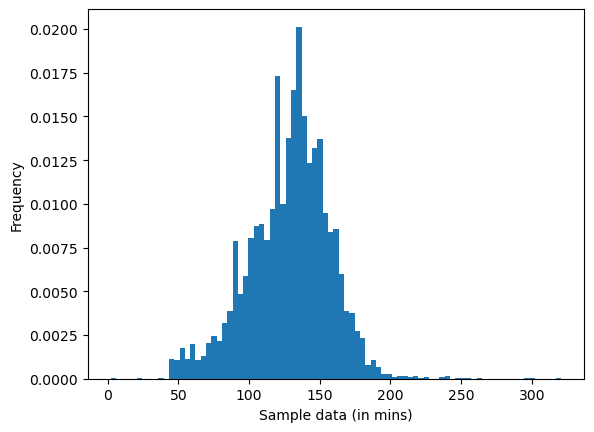

In [10]:
fig, ax = plt.subplots()
ax.hist(movies_data['time'], np.round(np.sqrt(len(movies_data))).astype(int), density=True)
ax.set_xlabel('Sample data (in mins)')
ax.set_ylabel('Frequency');

In [13]:
#Manually: Find the percentage of films having a duration of less than or equal to 150 mins.
(movies_data['time'] <= 150.0).sum() / len(movies_data['time']) * 100

79.40607734806629

## Quantile Plot

In [11]:
data_series = movies_data['time'].sort_values().reset_index(drop=True)

n = len(data_series)
k = np.arange(1,n+1)

df = pd.DataFrame({'k': k, 'sample_data': data_series})
df['pd_pct'] = data_series.rank(pct=True, method='max')
df.head()

,k,sample_data,pd_pct
0,1,2.0,0.000138
1,2,21.0,0.000276
2,3,37.0,0.000414
3,4,45.0,0.002624
4,5,45.0,0.002624


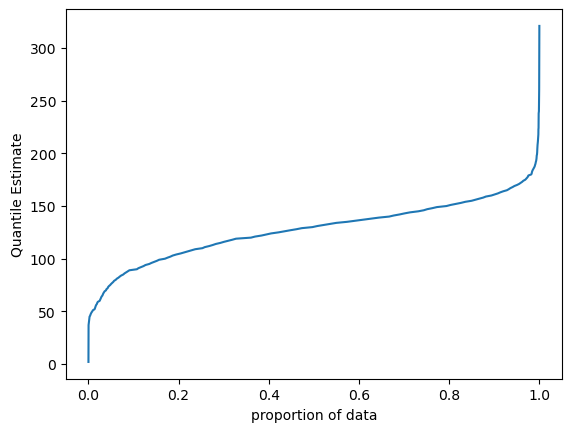

In [12]:
fig, ax = plt.subplots()
ax.plot(df['pd_pct'], df['sample_data'])
ax.set_xlabel('proportion of data')
ax.set_ylabel('Quantile Estimate');

### To find the quantile rank $p$, given a data value:

In [14]:
stats.percentileofscore(movies_data['time'], 150.0, kind='weak')

79.40607734806629

Inference: <br>
79.40% of the films have a duration of less than or equal to 150 minutes.

### (optional) To find the quantile, given $p$:

In [15]:
movies_data['time'].quantile(0.7940)

150.0

Data Source: https://data.world/adrianmcmahon/imdb-dataset-all-indian-movies